<h1 align="left">
<img src="../roulette.jpg" alt="monaco" height="100" width="100" align="right"/>
</h1>

# Task and project estimation with monaco

This notebook showcases the monaco python package by applying it to a project estimation task.

The monaco python package can be found here: [](https://github.com/sepam/monaco)

## Introduction

Estimating the duration of projects and tasks is difficult. Often the time it takes to complete is dependent on variables that can not be controlled or foreseen, and a great deal of uncertainty must be factored into any estimates made. 

One way to do this is to model a Task as a stochastic process and simulate that process many times to establish the likelihood of completion within a certain amount of time.

For this tutorial we will assume a project where we build a machine learning model from scratch to deploying it in production. This project exists of the following sequential tasks:


![Building an ML model](project_example.png)

In [1]:
from monaco import Task, Project
import seaborn as sns

# Task example 1

In [2]:
task1 = Task(name='Problem definition', min=1, max=5, estimator='uniform')

In [3]:
task1.estimate()

1.9481611936948346

In [4]:
[task1.estimate() for i in range(10)]

[2.8189768476502737,
 3.653121307296255,
 1.1410458638599055,
 3.6442235268352157,
 3.1174762206053654,
 1.157167829005993,
 4.660887431375501,
 4.377788825365304,
 3.363736228022542,
 3.6406909788064996]

In [5]:
task1_estimates = [task1.estimate() for i in range(1000)]

/Users/martijn/.conda/envs/notebooks/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


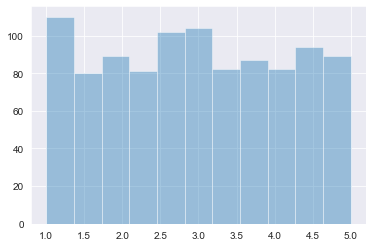

In [6]:
sns.distplot(task1_estimates, hist=True, kde=False);

# Task example 2

In [7]:
task2 = Task(name='Convince CEO', min=3, mode=8, max=9, estimator='triangular')

In [8]:
task2.estimate()

5.348597237661103

In [9]:
[task2.estimate() for i in range(10)]

[3.8269407989439617,
 7.1010468958864745,
 8.637431263795609,
 7.045425054734851,
 5.80163468182041,
 5.273956900098104,
 7.318773888018993,
 6.721261521710319,
 4.129558256608372,
 4.284067216393565]

In [10]:
task2_estimates = [task2.estimate() for i in range(1000)]

<AxesSubplot:>

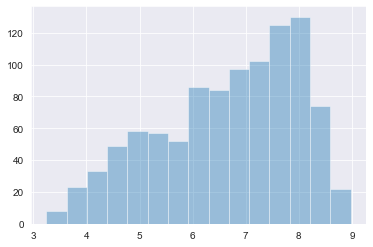

In [11]:
sns.distplot(task2_estimates, hist=True, kde=False)

# Project estimation

Now we'll model the project in sequence: 
- First we initiate a project
- Then we define the project tasks
- Finally we add the tasks to the project


To estimate a task we use the following notation:

![](task_definition.png)


The full project is estimated as follows:

![](project_estimation.png)


In [ ]:
p = Project(name='New Feature')

In [ ]:
t1 = Task(name='Problem definition', min=1, max=5, estimator='uniform')
t2 = Task(name='Convince CEO', min=1, mode=2, max=3, estimator='uniform')
t3 = Task(name='Engineering', min=3, mode=4, max=9, estimator='triangular')
t4 = Task(name='QA', min=1, mode=2, max=4, estimator='triangular')
t5 = Task(name='Demo', min=1, mode=2, max=5, estimator='triangular')
t6 = Task(name='Deploy', min=3, mode=7, max=9, estimator='triangular')

In [ ]:
p.add_task(t1)
p.add_task(t2)
p.add_task(t3)
p.add_task(t4)
p.add_task(t5)
p.add_task(t6)

# Estimated project duration

Running a monte carlo simulation means summing the result of n estimations of random variables. The Central Limit Theorem tells us that with large enough "n" the new distribution will approximate a normal distribution.

This allows us to estimate the probability of completing the project within a certain number of days.

In [ ]:
project_duration_probability_curve = p.plot(n=10000)

## Cumulative distribution function

The CDF allows us to easily read out the probability of completing the project under a certain number of days.

In [ ]:
project_duration_cumulative_probability_curve = p.plot(n=10000, hist=False)